# 1. 필요한 라이브러리 설치

In [113]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
from inspect import findsource
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()

    if system_name == 'Darwin' :
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family

In [115]:
# style 설정은 꼭 폰트설정 위에서 한다. 
# style에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 깨진다.
plt.style.use('seaborn')

#폰트설정
plt.rc('font', family=get_font_family())

#마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
# 그래프 해상도 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/1790882891.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


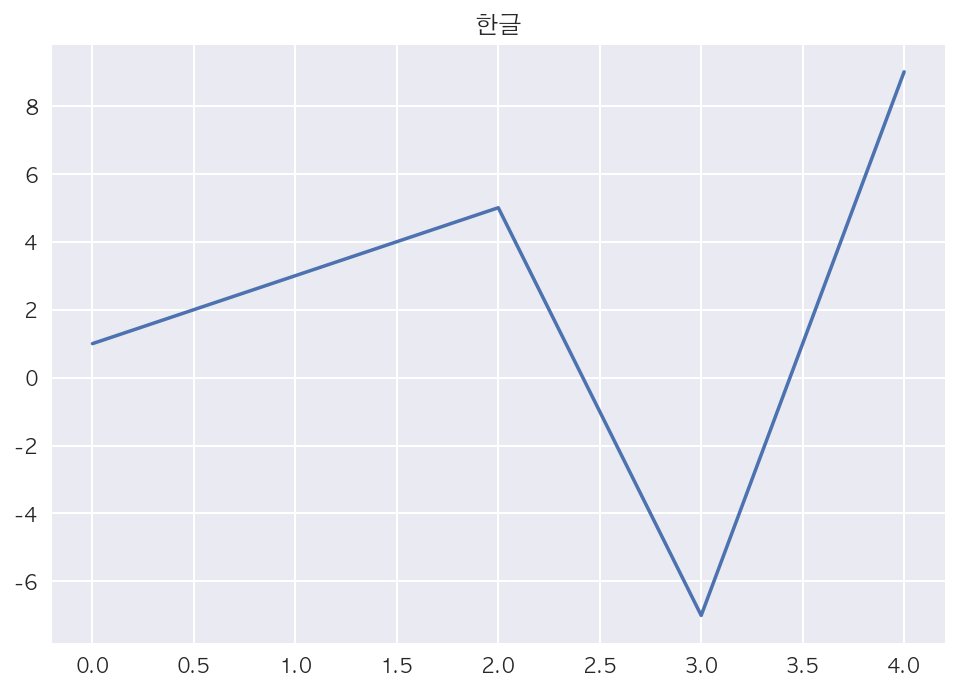

In [116]:
#한글폰트 동작확인
pd.Series([1,3,5,-7,9]).plot(title='한글');

# 2. EDA

In [117]:
popular_items = pd.read_csv('/Users/cmblir/Python/Musinsa-Analysis/Crawled files/popular_items.csv')

In [118]:
popular_items.head(10)

,category,popular_items_brand_name
0,데님팬츠,반스
1,데님팬츠,컨버스
2,데님팬츠,브랜즈
3,데님팬츠,반스
4,데님팬츠,컨버스
5,데님팬츠,컨버스
6,데님팬츠,커스텀에이드
7,데님팬츠,반스
8,데님팬츠,올리버커스텀
9,데님팬츠,반스


In [119]:
popular_items['category'].value_counts()

데님팬츠          810
코튼팬츠          810
긴팔 티셔츠        810
컨버스/단화        810
로퍼            810
선글라스          810
러닝화/피트니스화     810
민소매 티셔츠       810
슈트 팬츠/슬랙스     810
트레이닝/조거 팬츠    810
향수/탈취         810
캠핑용품          810
Name: category, dtype: int64

In [120]:
lopper = popular_items[popular_items.category == '로퍼'].value_counts()[:10]

<AxesSubplot:xlabel='category,popular_items_brand_name'>

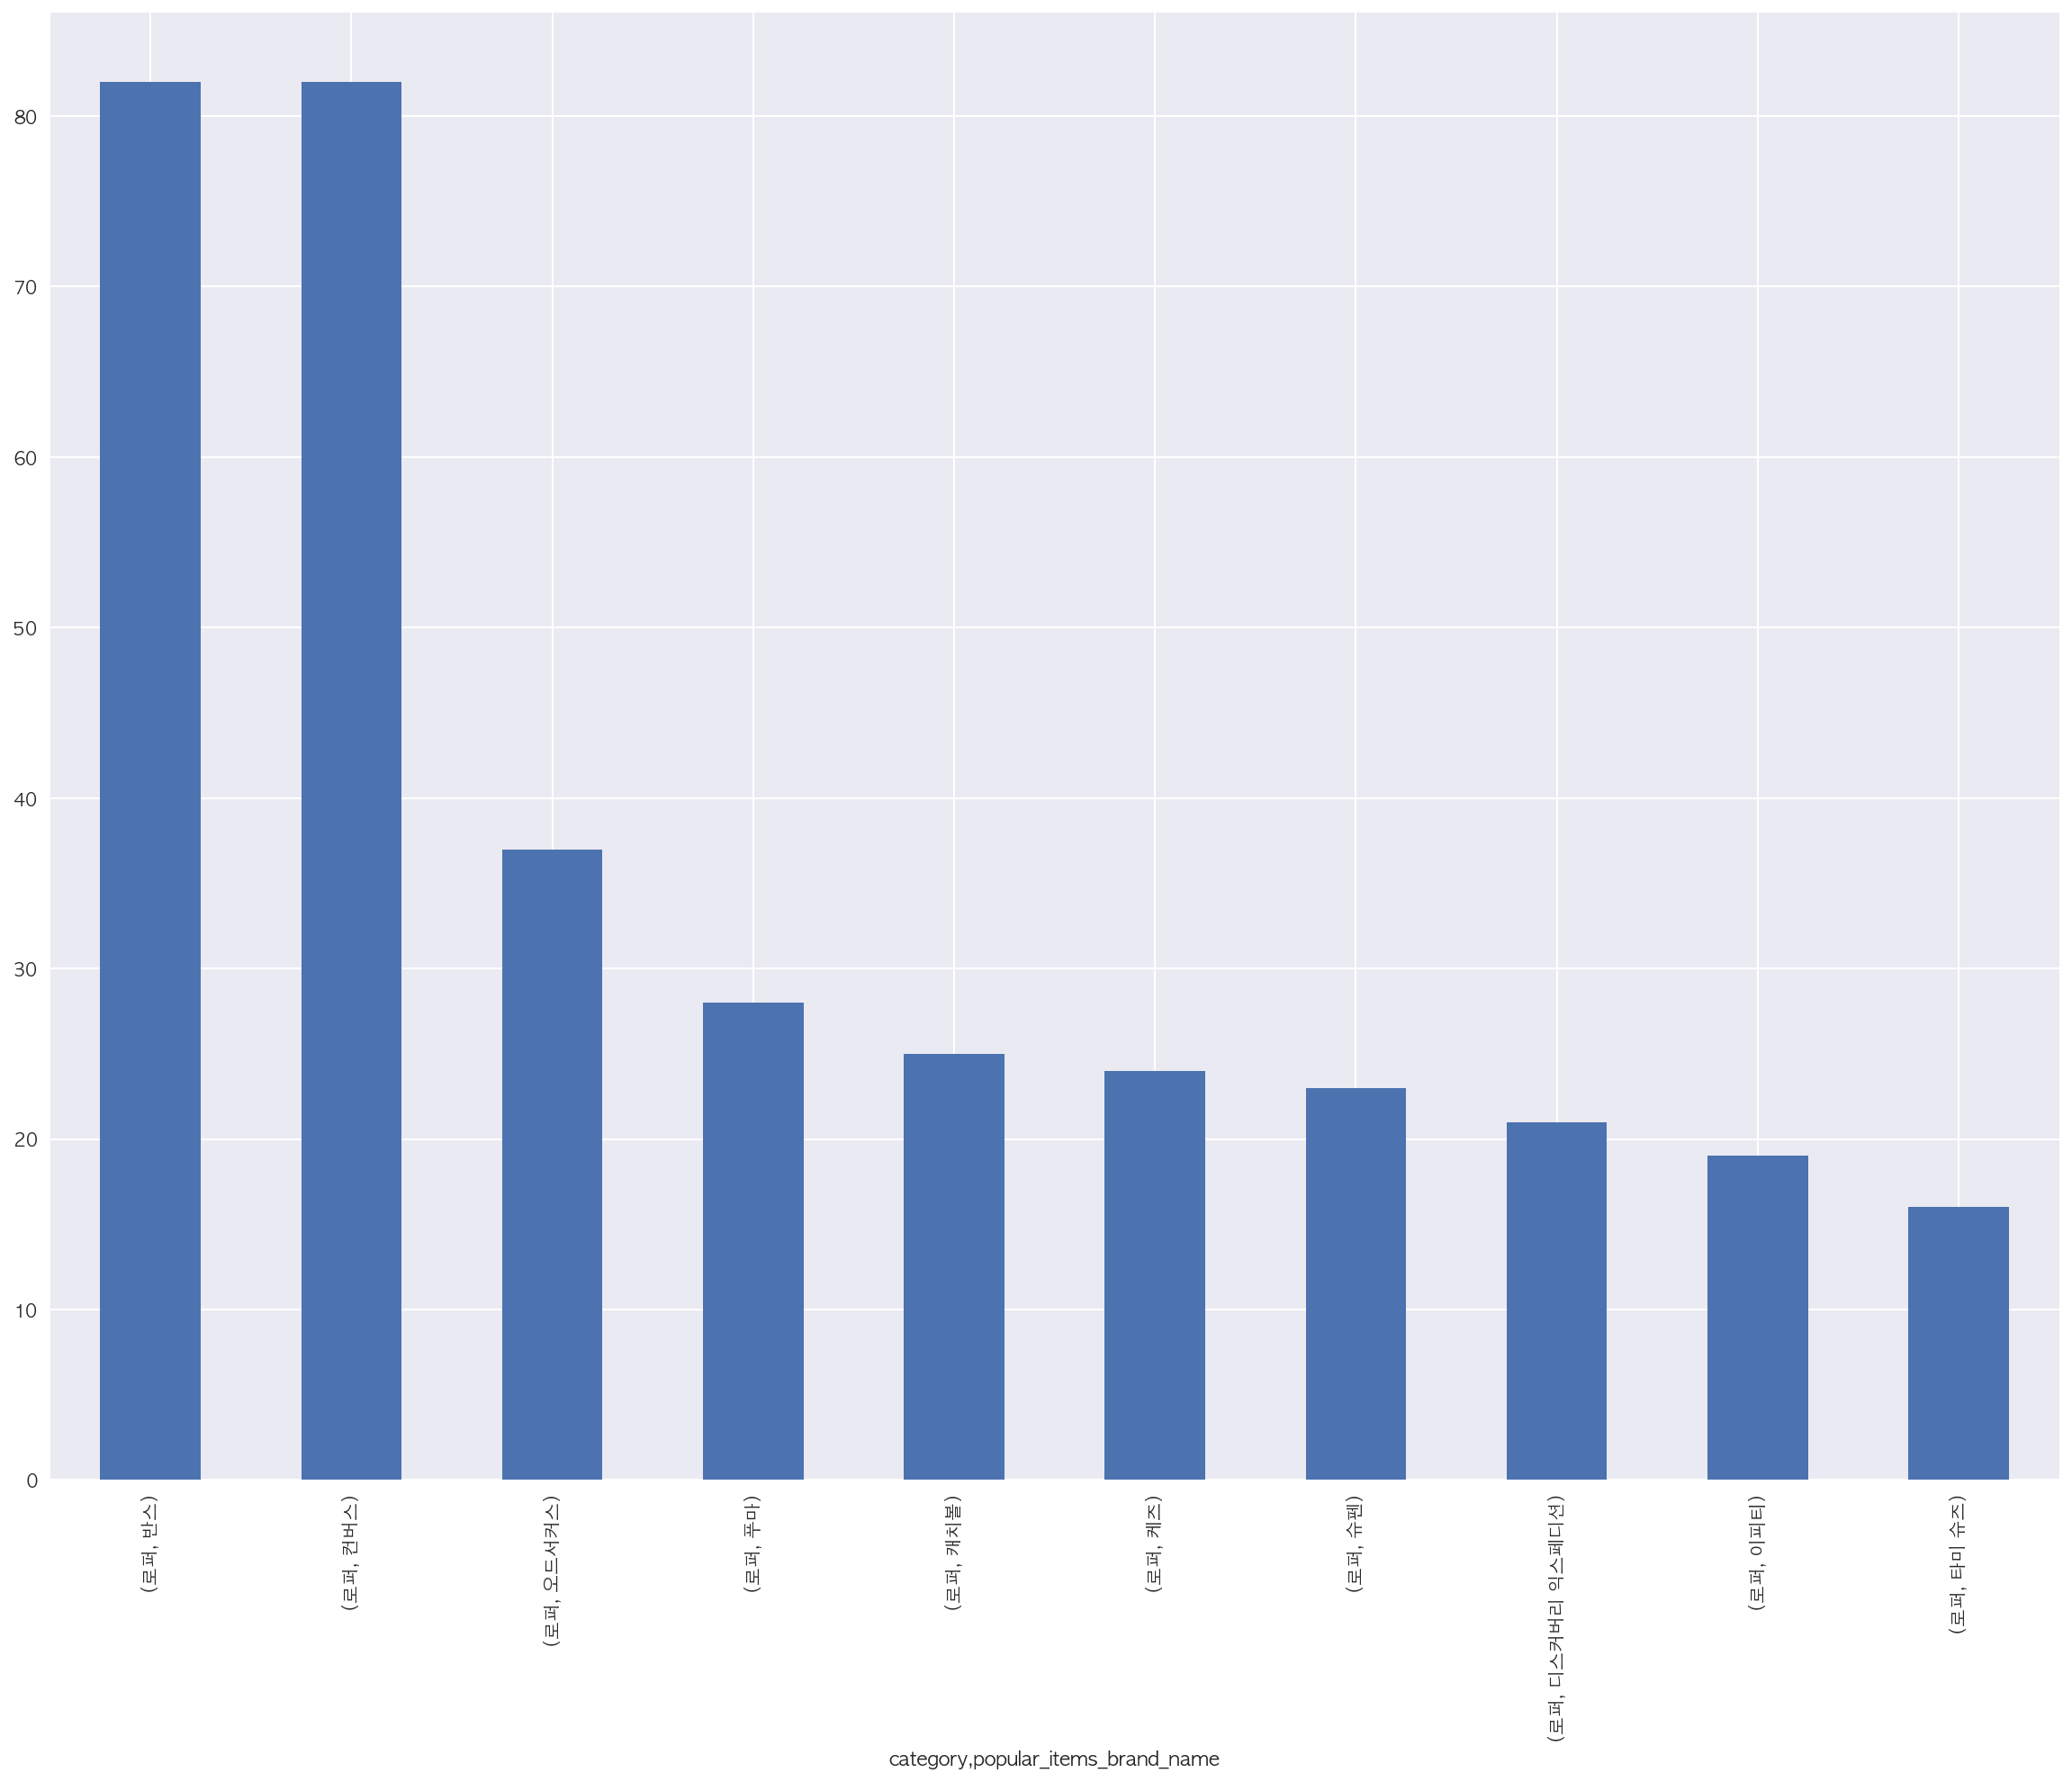

In [121]:
lopper.transpose().plot(kind='bar', figsize=(20,15), fontsize = 10)

In [122]:
!pip install konlpy

In [123]:
!pip install wordcloud

In [124]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

ImportError: dlopen(/Users/cmblir/miniforge3/envs/test/lib/python3.9/site-packages/wordcloud/query_integral_image.cpython-39-darwin.so, 0x0002): tried: '/Users/cmblir/miniforge3/envs/test/lib/python3.9/site-packages/wordcloud/query_integral_image.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))

In [125]:
reviews = pd.read_csv("/Users/cmblir/Python/Musinsa-Analysis/Crawled files/reviews.csv")

In [126]:
reviews.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x


In [127]:
bad_reviews = reviews[reviews.review_type == '낮은 평점']

In [128]:
good_reviews = reviews[reviews.review_type == '높은 평점']

In [129]:
text = reviews["review"]

In [130]:
bad_reviews.to_csv('bad_reviews.txt', index = False, header = None)
good_reviews.to_csv('good_reviews.txt', index = False, header = None)

In [131]:
text.to_csv('reviews.txt', index = False, header = None)

In [132]:
from konlpy.tag import Okt

In [133]:
Okt = Okt()
text = open('reviews.txt').read()
bad_reviews = open('bad_reviews.txt').read()
good_reviews = open('good_reviews.txt').read()
sentences_tag = []
sentences_tag = Okt.pos(text)
bad_sentences_tag = Okt.pos(bad_reviews)
good_sentences_tag = Okt.pos(good_reviews)

In [ ]:
import platform
print(platform.architecture())

('64bit', '')


In [ ]:
noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

In [ ]:
good_noun_adj_list = []

for word, tag in good_sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        good_noun_adj_list.append(word)

In [ ]:
bad_noun_adj_list = []

for word, tag in bad_sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        bad_noun_adj_list.append(word)

# 3. 데이터 시각화

### 중간 파일 점검

1. 단순 리뷰 : reviews.txt
2. 나쁜 리뷰 : bad_reviews.txt
3. 좋은 리뷰 : good_reveiews.txt

In [ ]:
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('text.jpg')

In [ ]:
counts = Counter(good_noun_adj_list)
good_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
good_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
good_cloud = good_wc.generate_from_frequencies(dict(good_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
good_cloud.to_file('good_text.jpg')

In [ ]:
counts = Counter(bad_noun_adj_list)
bad_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
bad_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
bad_cloud = bad_wc.generate_from_frequencies(dict(bad_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
bad_cloud.to_file('bad_text.jpg')

In [ ]:
import matplotlib.pyplot as plt

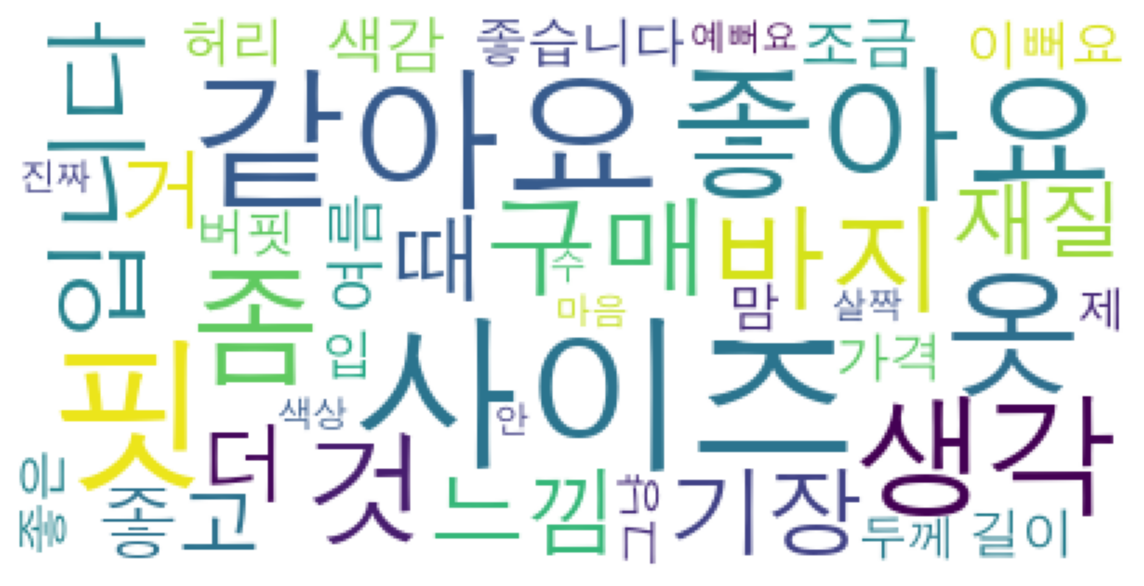

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

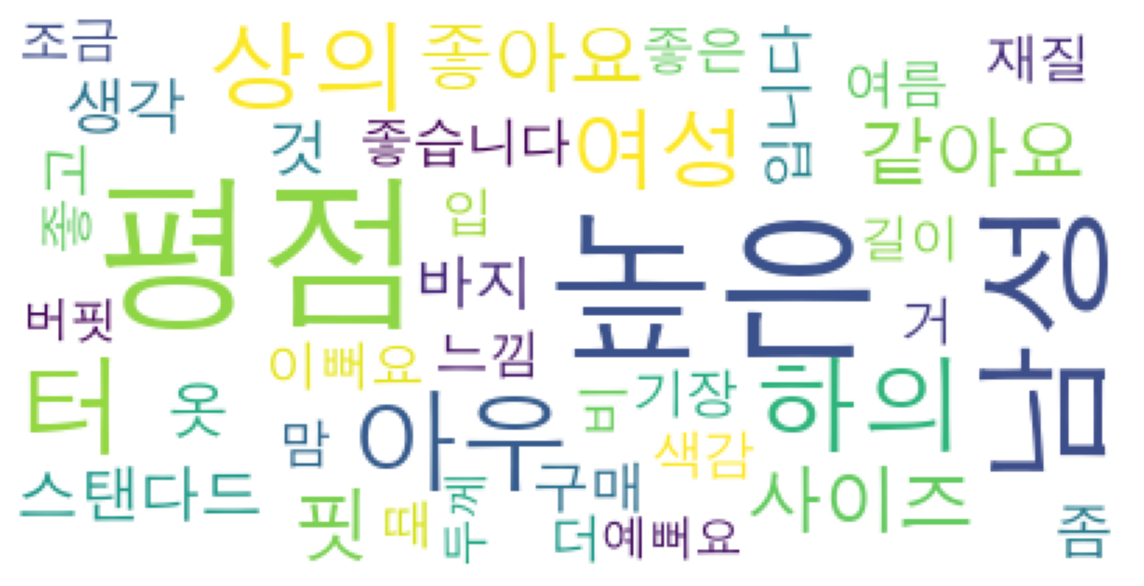

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(good_cloud)
plt.show()

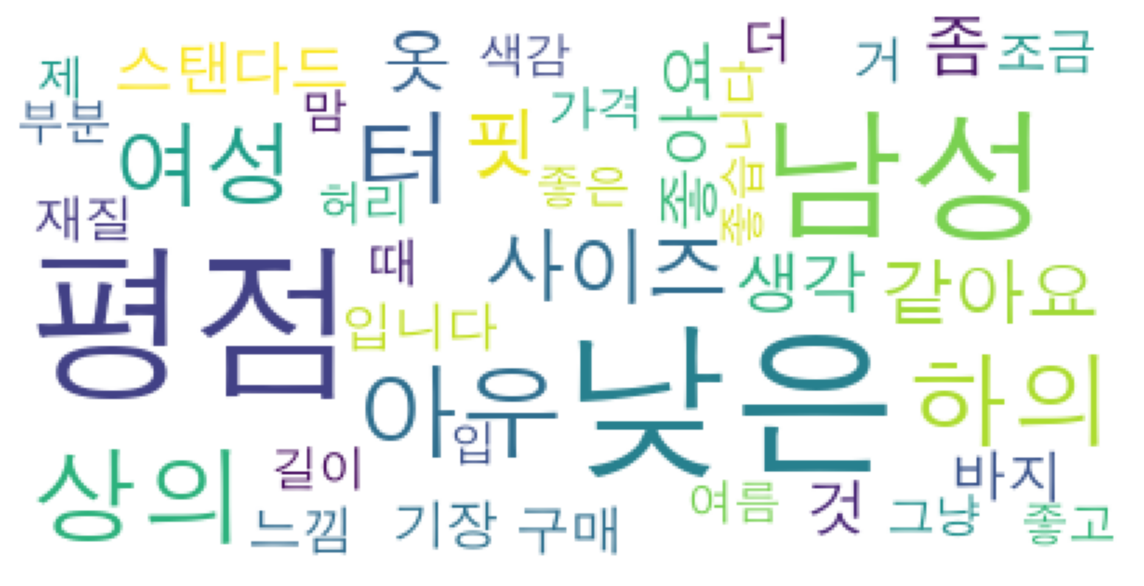

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(bad_cloud)
plt.show()

In [ ]:
top10 = [i for i in tags[:10]]
top10

[('사이즈', 3987),
 ('핏', 3797),
 ('같아요', 3426),
 ('좋아요', 3024),
 ('옷', 2701),
 ('생각', 2509),
 ('좀', 2438),
 ('것', 2258),
 ('바지', 1913),
 ('구매', 1775)]

# 번외. 웹에 사용할 데이터 pickling

In [ ]:
import pickle
with open('top10_words.pickle', 'wb') as f:
    pickle.dump(top10, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
names_after = []
cnt_after = []
for i in top10:
  cnt_after.append(i[1])
  names_after.append(i[0])

In [ ]:
good_top10 = [i for i in good_tags[:10]]
good_top10

[('높은', 8374),
 ('평점', 8370),
 ('남성', 6267),
 ('터', 3037),
 ('아우', 3031),
 ('하의', 2883),
 ('상의', 2610),
 ('여성', 2026),
 ('핏', 1566),
 ('사이즈', 1448)]

In [ ]:
bad_top10 = [i for i in bad_tags[:10]]
bad_top10

[('낮은', 12560),
 ('평점', 12547),
 ('남성', 9134),
 ('상의', 4367),
 ('터', 4245),
 ('아우', 4235),
 ('하의', 4212),
 ('여성', 3405),
 ('사이즈', 2539),
 ('핏', 2252)]

In [ ]:
stopwords = ['좋아요', '옷', '좀', '것', '바지', '구매', '같아요', '생각', '터', '구매', '아우', '평점']

In [ ]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [ ]:
from collections import Counter
c = Counter(noun_adj_list)

In [ ]:
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [ ]:
tmp

['사이즈',
 '핏',
 '입니다',
 '기장',
 '느낌',
 '때',
 '재질',
 '더',
 '거',
 '좋고',
 '색감',
 '여름',
 '조금',
 '좋습니다',
 '이뻐요',
 '입',
 '좋은',
 '길이',
 '맘',
 '허리',
 '가격',
 '버핏',
 '두께',
 '제',
 '그냥',
 '예뻐요',
 '진짜',
 '마음',
 '살짝',
 '수',
 '안',
 '색상',
 '부분',
 '이쁘고',
 '좋네요',
 '제품',
 '추천',
 '정도',
 '무난',
 '감',
 '색',
 '아주',
 '디자인',
 '정말',
 '비',
 '편하게',
 '약간',
 '사진',
 '자주',
 '같습니다',
 '가성',
 '저',
 '티',
 '소재',
 '배송',
 '처음',
 '만족합니다',
 '이',
 '다른',
 '봄',
 '편하고',
 '얇아서',
 '하나',
 '어깨',
 '있어서',
 '크게',
 '용',
 '별로',
 '예쁘고',
 '원단',
 '듯',
 '통',
 '와이드',
 '지금',
 '이쁩니다',
 '완전',
 '있는',
 '키',
 '같은',
 '마감',
 '고민',
 '요즘',
 '날씨',
 '상품',
 '커서',
 '스타일',
 '요',
 '같네요',
 '역시',
 '있어요',
 '포인트',
 '오버',
 '팔',
 '후기',
 '듭니',
 '목',
 '운동',
 '분',
 '다만',
 '색깔']

In [ ]:
add_stopwords = ["좋고", "입니다", "더", "좋습니다", "거", "떄", "좋은", "맘", "입", "비", "길이", "조금", "진짜", "마음", "수", "제", "아주", "살짝", "자주", "감", "정말", "안", "같습니다", "드", "정도", "그냥", "코드", "티", "약간", "어", "하나", "얇아서", "라피", "저", "낫", "지금", "요즘", "처음", "이",
                 "있어서", "디스", "완전", "버댓", "부분", "다른", "용", "역시", "굿", "키", "고민", "있는", "사진", "크게", "있어요", "듭니다", "어깨", "에스"]
for i in add_stopwords:
  stopwords.append(i)

In [ ]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [ ]:
from collections import Counter
c = Counter(noun_adj_list)
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [ ]:
tmp

['사이즈',
 '핏',
 '기장',
 '느낌',
 '때',
 '재질',
 '색감',
 '여름',
 '이뻐요',
 '허리',
 '가격',
 '버핏',
 '두께',
 '예뻐요',
 '색상',
 '이쁘고',
 '좋네요',
 '제품',
 '추천',
 '무난',
 '색',
 '디자인',
 '편하게',
 '가성',
 '소재',
 '배송',
 '만족합니다',
 '봄',
 '편하고',
 '별로',
 '예쁘고',
 '원단',
 '듯',
 '통',
 '와이드',
 '이쁩니다',
 '같은',
 '마감',
 '날씨',
 '상품',
 '커서',
 '스타일',
 '요',
 '같네요',
 '포인트',
 '오버',
 '팔',
 '후기',
 '듭니',
 '목',
 '운동',
 '분',
 '다만',
 '색깔',
 '편이',
 '주문',
 '얇고',
 '코디',
 '만족',
 '지퍼',
 '품',
 '셔츠',
 '세탁',
 '색도',
 '블랙',
 '좋은데',
 '교환',
 '걸',
 '이쁘네요',
 '퀄리티',
 '대비',
 '냄새',
 '가을',
 '또',
 '허벅지',
 '착용',
 '전체',
 '로고',
 '후드',
 '이뻐서',
 '일단',
 '한번',
 '번',
 '적당히',
 '해',
 '너',
 '데',
 '있습니다',
 '참고',
 '자체',
 '편',
 '적당하고',
 '구입',
 '예쁩니다',
 '도',
 '얇은',
 '엉덩이',
 '프린팅',
 '좋아서',
 '전']

In [ ]:
add_stopwords = ['높은','남성','하의','상의','여성','스탠다드','이뻐요','때','예뻐요','버핏','이쁘고','스토어','좋네요','편하게',
 '무난','편하고','만족합니다','예일','소재','날씨','제품','예쁘고','이쁩니다','듭니','이쁘네요','색도','통','최고','듯',
 '토피','만족','와릿이즌','그레이','리','같네요','같은','오버','적당히','적당하고','적당한','이뻐서','요','가을','나인','별로','아디다스','팔','셔츠','예쁩니다','편이','엘무드',
 '엄브로','트','분','스튜디오','폴로','후드','품','커서','피오','블랙','도','가디건','또','원하던','얇고','편해요','예뻐서','스컬','프터','상품','걱정']
for i in add_stopwords:
  stopwords.append(i)

In [ ]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [ ]:
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('stopwords_add_text.jpg')

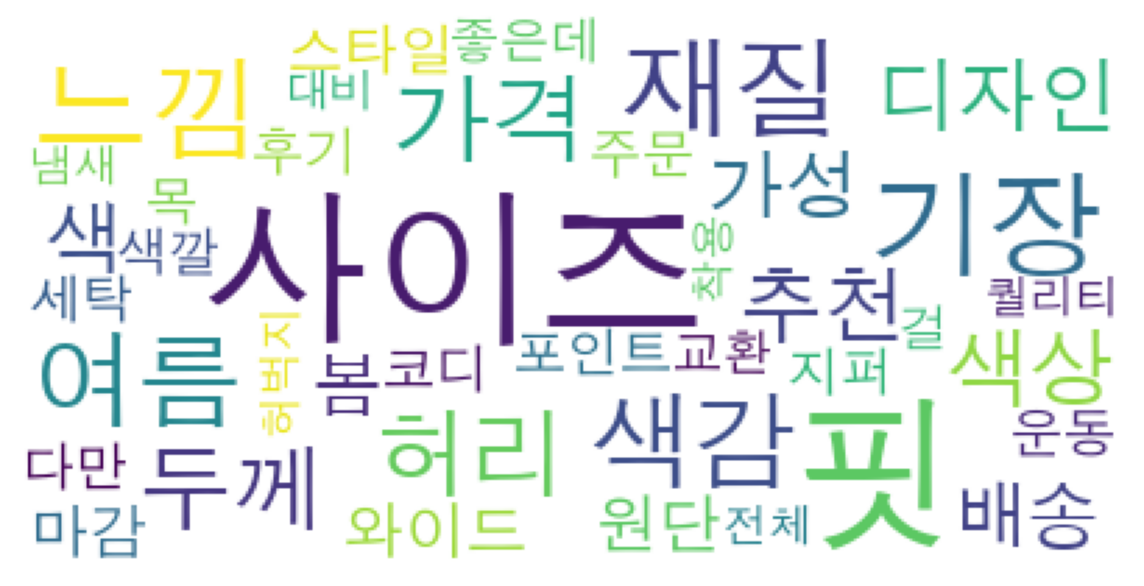

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
top10 = [i for i in tags[:10]]
top10

[('사이즈', 3987),
 ('핏', 3797),
 ('기장', 1616),
 ('느낌', 1521),
 ('재질', 1476),
 ('색감', 1360),
 ('여름', 1330),
 ('허리', 1128),
 ('가격', 1121),
 ('두께', 1023)]

In [ ]:
names = []
cnt = []
for i in top10:
  cnt.append(i[1])
  names.append(i[0])

<BarContainer object of 10 artists>

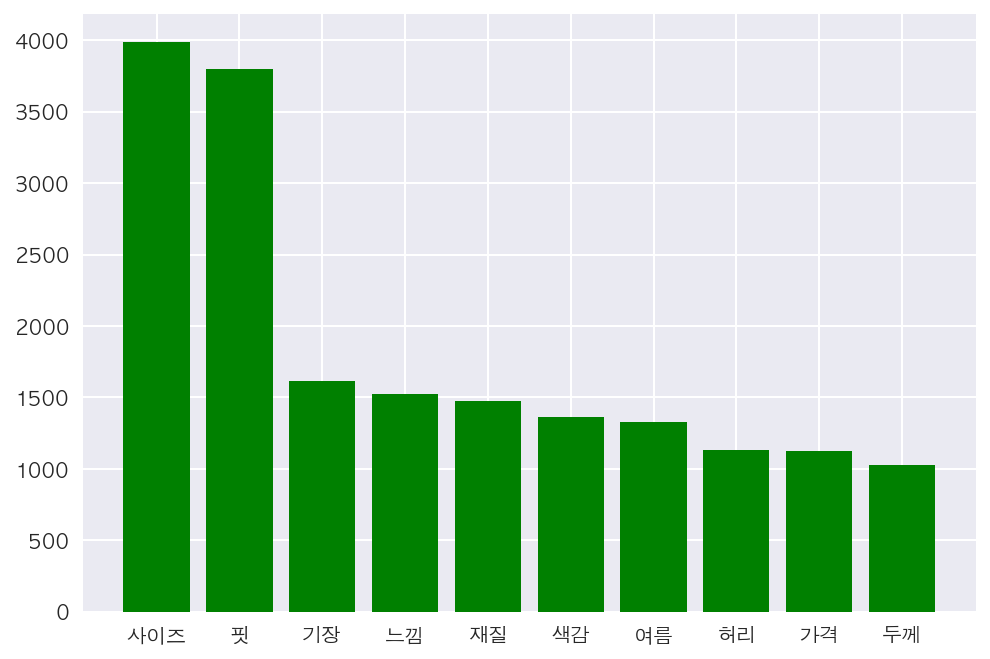

In [ ]:
plt.bar(names, cnt, color = 'g') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

<BarContainer object of 10 artists>

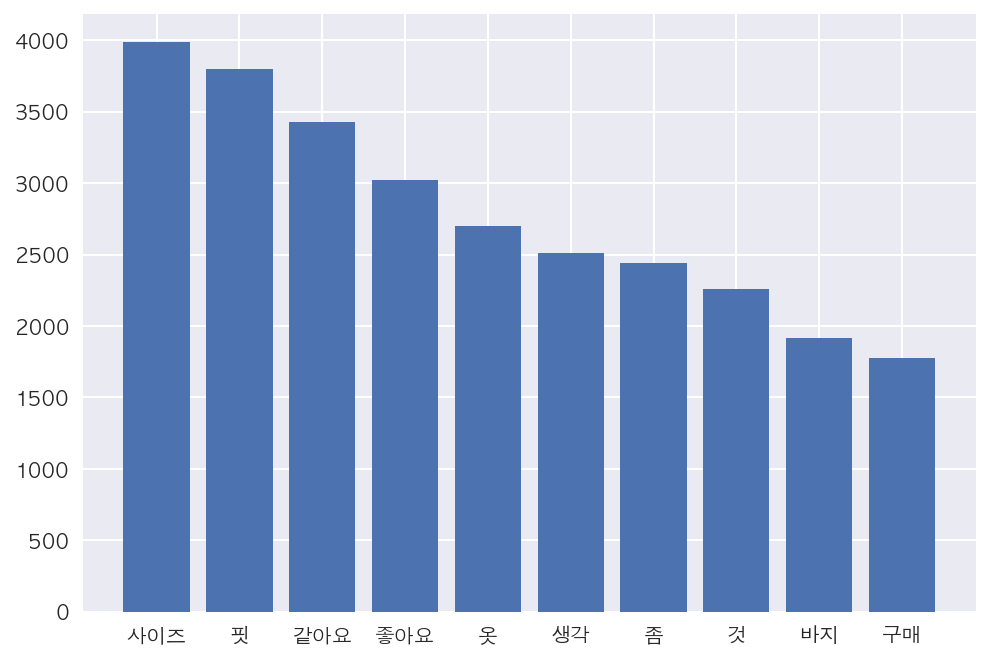

In [ ]:
plt.bar(names_after, cnt_after) # 모든 리뷰 데이터에서 언급되는 전처리 이전 상위 10개 단어

# 번외. 워드 클라우드 가독성을 위한 추가 불용어 사전

In [ ]:
from collections import Counter
c = Counter(noun_adj_list)
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [ ]:
tmp

['사이즈',
 '핏',
 '기장',
 '느낌',
 '재질',
 '색감',
 '여름',
 '허리',
 '가격',
 '두께',
 '색상',
 '추천',
 '색',
 '디자인',
 '가성',
 '배송',
 '봄',
 '원단',
 '와이드',
 '마감',
 '스타일',
 '포인트',
 '후기',
 '목',
 '운동',
 '다만',
 '색깔',
 '주문',
 '코디',
 '지퍼',
 '세탁',
 '좋은데',
 '교환',
 '걸',
 '퀄리티',
 '대비',
 '냄새',
 '허벅지',
 '착용',
 '전체',
 '로고',
 '일단',
 '한번',
 '번',
 '해',
 '너',
 '데',
 '있습니다',
 '참고',
 '자체',
 '편',
 '구입',
 '얇은',
 '엉덩이',
 '프린팅',
 '좋아서',
 '전',
 '레이어',
 '좋을',
 '브랜드',
 '개',
 '위',
 '보풀',
 '있을',
 '보고',
 '주머니',
 '이쁘게',
 '로',
 '예쁜',
 '단추',
 '겨울',
 '크롭',
 '니트',
 '매우',
 '앞',
 '막',
 '청바지',
 '기본',
 '중',
 '이즈',
 '입을거',
 '점',
 '평소',
 '보리',
 '있고',
 '질',
 '손',
 '뭐',
 '입을게요',
 '소매',
 '괜찮은',
 '때문',
 '같아서',
 '예쁘게',
 '괜찮아요',
 '컬러',
 '팬츠',
 '날',
 '티셔츠',
 '살']

In [ ]:
good_unique_Noun_words = set(good_noun_adj_list)
for word in good_unique_Noun_words:
    if word in stopwords:
        while word in good_noun_adj_list: good_noun_adj_list.remove(word)

In [ ]:
counts = Counter(good_noun_adj_list)
good_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
good_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
good_cloud = good_wc.generate_from_frequencies(dict(good_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
good_cloud.to_file('good_text.jpg')

In [ ]:
good_top10 = [i for i in good_tags[:10]]
good_top10

[('핏', 1566),
 ('사이즈', 1448),
 ('기장', 596),
 ('여름', 583),
 ('색감', 578),
 ('재질', 540),
 ('느낌', 520),
 ('두께', 430),
 ('허리', 395),
 ('가격', 393)]

In [ ]:
good_names = []
good_cnt = []
for i in good_top10:
  good_cnt.append(i[1])
  good_names.append(i[0])

<BarContainer object of 10 artists>

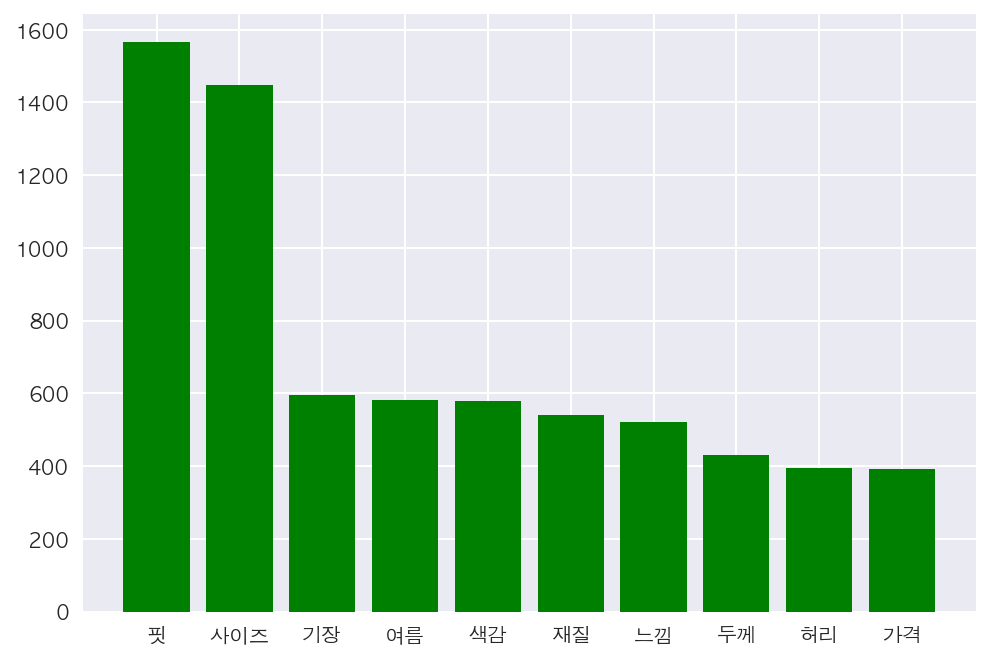

In [ ]:
plt.bar(good_names, good_cnt, color = 'g') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

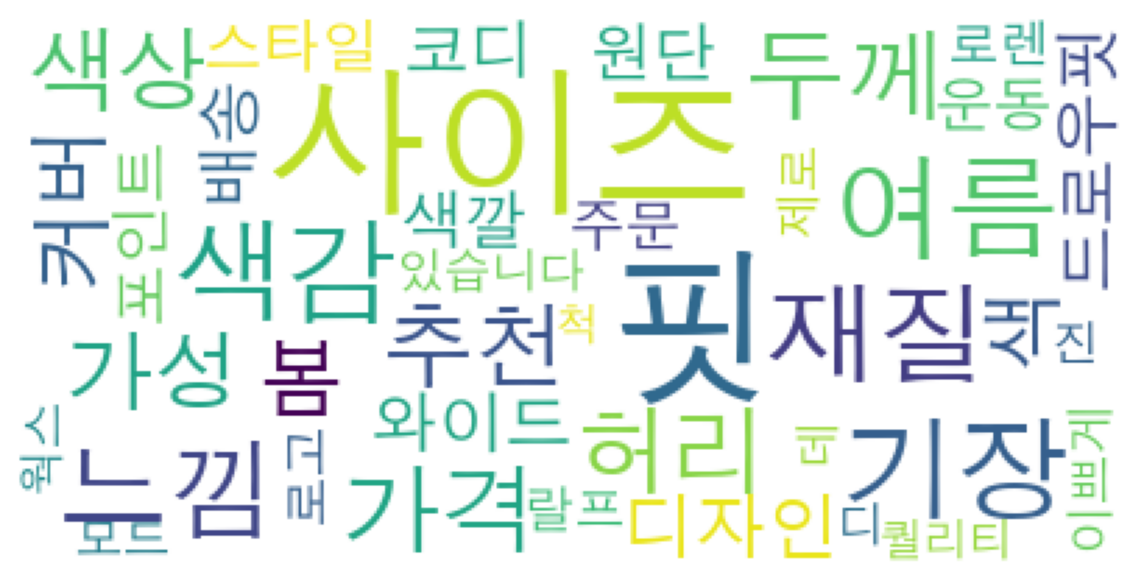

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(good_cloud)
plt.show()

In [ ]:
bad_unique_Noun_words = set(bad_noun_adj_list)
for word in bad_unique_Noun_words:
    if word in stopwords:
        while word in bad_noun_adj_list: bad_noun_adj_list.remove(word)

In [ ]:
counts = Counter(bad_noun_adj_list)
bad_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
bad_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
bad_cloud = bad_wc.generate_from_frequencies(dict(bad_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
bad_cloud.to_file('bad_text.jpg')

In [ ]:
bad_top10 = [i for i in bad_tags[:10]]
bad_top10

[('낮은', 12560),
 ('사이즈', 2539),
 ('핏', 2252),
 ('기장', 1020),
 ('느낌', 1001),
 ('재질', 936),
 ('색감', 782),
 ('여름', 747),
 ('허리', 733),
 ('가격', 728)]

In [ ]:
bad_names = []
bad_cnt = []
for i in bad_top10:
  bad_cnt.append(i[1])
  bad_names.append(i[0])

<BarContainer object of 10 artists>

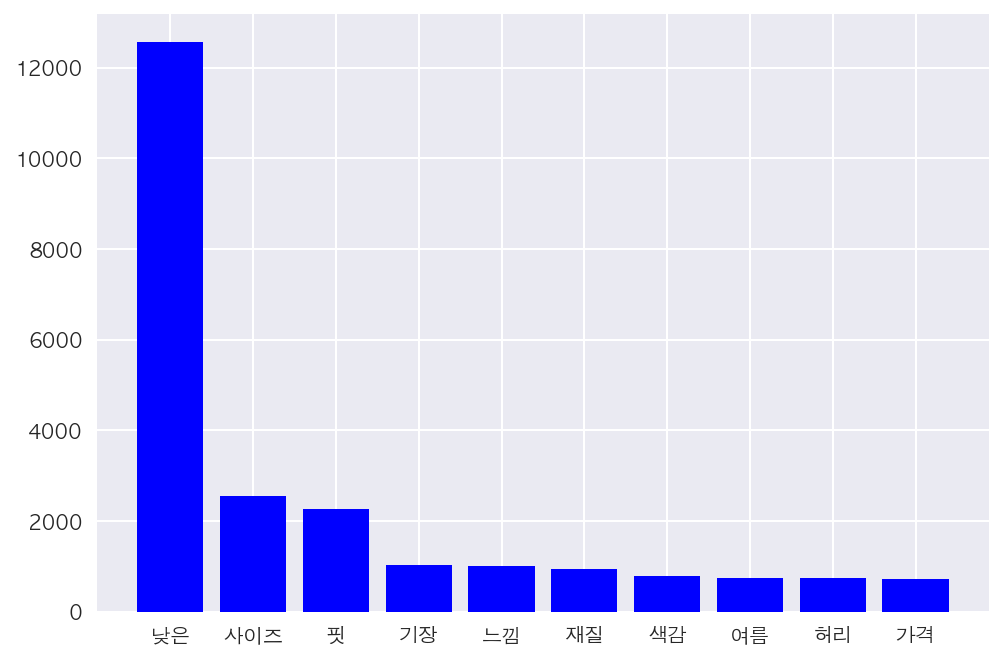

In [ ]:
plt.bar(bad_names, bad_cnt, color = 'b') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

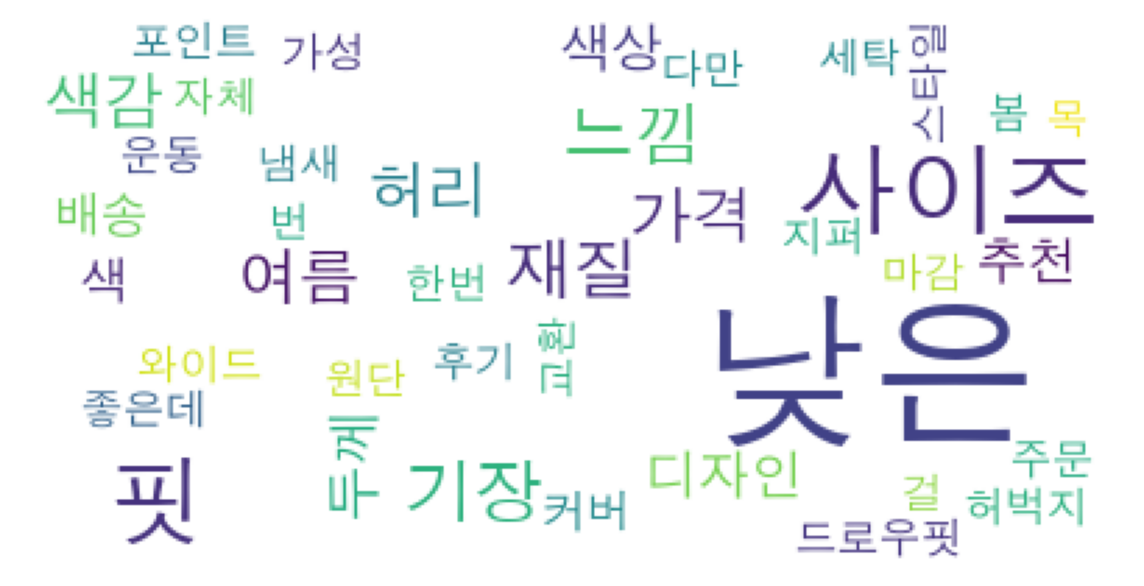

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(bad_cloud)
plt.show()

# 4. TF-IDF로 단어간 유사도 검사

In [ ]:
docs = text
vocab = list(set(w for doc in docs for w in doc.split()))

# 총 문서의 수
N = len(docs)

In [ ]:
from math import log

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t, d) * idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [ ]:
tf_

,묻,세,팬,딱,챘,톤,교,톱,뱅,욜,...,뜻,혼,긔,캬,쌍,뎁,z,끗,뿝,잖
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

NameError: name 'vocab' is not defined

# 5. 리뷰 데이터 머신러닝

In [ ]:
reviews.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x


In [ ]:
reviews_rating = reviews.loc[:, ['rating', 'consumer rating']]

In [ ]:
reviews_rating

,rating,consumer rating
0,4.9,3.0
1,4.9,3.0
2,4.9,4.0
3,4.9,4.0
4,4.9,4.0
...,...,...
20912,4.8,5.0
20913,4.8,5.0
20914,4.8,5.0
20915,4.8,5.0


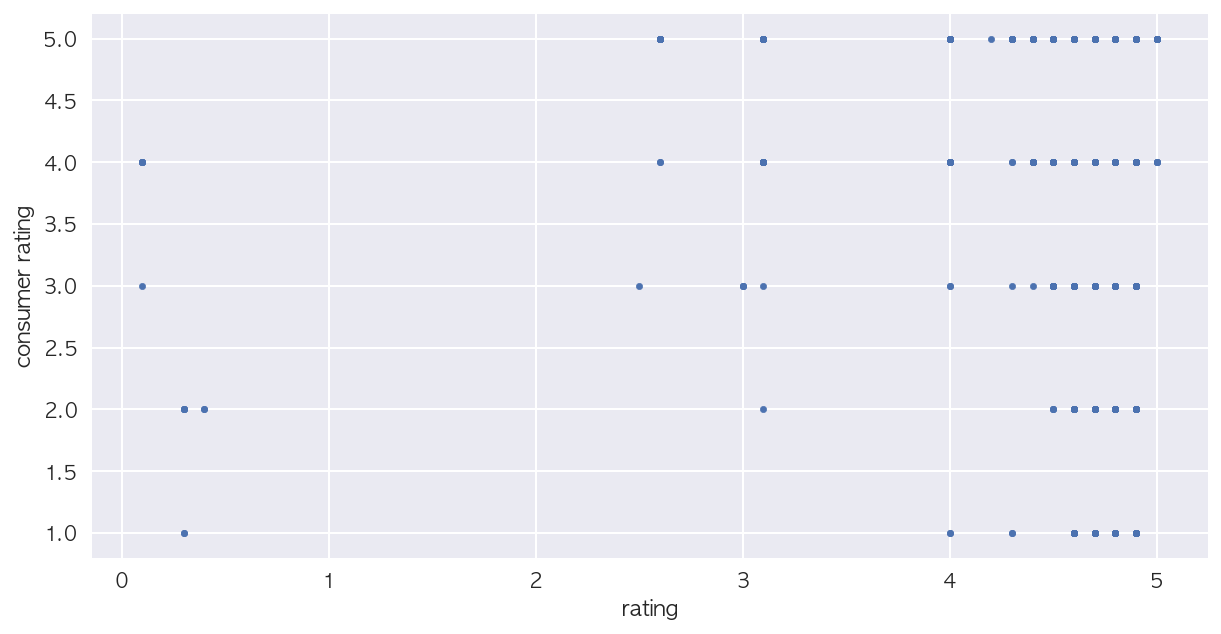

In [ ]:
reviews_rating.plot(kind='scatter', x='rating', y='consumer rating', s=10, figsize=(10, 5)) # 컬러, 점크기
plt.show()
plt.close()

데이터를 크롤링하는 과정중 리뷰의 경우 1,2,3,4,5 로 밖에 나오지않았기 떄문에 보다 정확한 결과를 도출하기 힘들었다.

# 6. 리뷰 데이터 긍부정 감정분석

In [ ]:
good_reviews.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
10,상의,높은 평점,4.9,"남성, 181cm, 81kg",5.0,푸마 셀렉트,기장은 짧지만 핏이 박시해서 예쁜 느낌\r\n아미맛 제대로 건졌네요 ! ㅎㅎ
11,상의,높은 평점,4.9,"남성, 181cm, 81kg",5.0,푸마 셀렉트,오버핏 인데 기장 짧아요\r\n품은커요\r\n가성비로 치면 매우 좋습니다\r\n매우...
12,상의,높은 평점,4.9,"남성, 181cm, 81kg",5.0,푸마 셀렉트,그레이에 블랙 로고가 예쁘게 박혀있어요! 비록 푸마지만 아미를 이 가격에 살수있다면...
13,상의,높은 평점,4.9,"남성, 181cm, 81kg",5.0,푸마 셀렉트,푸마 로고 네임펜으로 칠해버림.. 그냥 그럭저럭 입을만 해요..
14,상의,높은 평점,4.9,"남성, 181cm, 81kg",5.0,푸마 셀렉트,낙낙하고 짱짱하니 좋습니다 로고 포인트가 이뻐요


In [ ]:
bad_reviews.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x


In [ ]:
good_reviews = good_reviews.loc[:, ["review"]]

In [ ]:
good_reviews['label'] = 1

In [ ]:
good_reviews.head()

,review,label
10,기장은 짧지만 핏이 박시해서 예쁜 느낌\r\n아미맛 제대로 건졌네요 ! ㅎㅎ,1
11,오버핏 인데 기장 짧아요\r\n품은커요\r\n가성비로 치면 매우 좋습니다\r\n매우...,1
12,그레이에 블랙 로고가 예쁘게 박혀있어요! 비록 푸마지만 아미를 이 가격에 살수있다면...,1
13,푸마 로고 네임펜으로 칠해버림.. 그냥 그럭저럭 입을만 해요..,1
14,낙낙하고 짱짱하니 좋습니다 로고 포인트가 이뻐요,1


In [ ]:
bad_reviews = bad_reviews.loc[:, ["review"]]

In [ ]:
bad_reviews['label'] = 0

In [ ]:
bad_reviews.head()

,review,label
0,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요,0
1,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...,0
2,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다,0
3,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요,0
4,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x,0


In [ ]:
total = pd.concat([good_reviews, bad_reviews])

In [ ]:
print("긍정 리뷰 : ", len(good_reviews), ", ", "부정 리뷰 : ", len(bad_reviews)) 

긍정 리뷰 :  8370 ,  부정 리뷰 :  12547


In [ ]:
total.head()

,review,label
10,기장은 짧지만 핏이 박시해서 예쁜 느낌\r\n아미맛 제대로 건졌네요 ! ㅎㅎ,1
11,오버핏 인데 기장 짧아요\r\n품은커요\r\n가성비로 치면 매우 좋습니다\r\n매우...,1
12,그레이에 블랙 로고가 예쁘게 박혀있어요! 비록 푸마지만 아미를 이 가격에 살수있다면...,1
13,푸마 로고 네임펜으로 칠해버림.. 그냥 그럭저럭 입을만 해요..,1
14,낙낙하고 짱짱하니 좋습니다 로고 포인트가 이뻐요,1


In [ ]:
len(total)

20917

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(total, test_size = 0.3, shuffle = True, random_state = 42)

In [ ]:
print("훈련 데이터 개수 : ", len(train),", ", "테스트 데이터 개수 : ", len(test))

훈련 데이터 개수 :  14641 ,  테스트 데이터 개수 :  6276


In [ ]:
train[:5]

,review,label
15261,널널한 사이즈가 아니거 살짝 짧지만 디자인은 이뻐요,0
20764,마크곤잘래스 후드 집업이랑 같이 입으면 예뻐요.,1
1410,"M 사이즈 딱이네여, 어떤 바지랑도 매칭이 아주 잘어울려요",1
9485,사이즈가 생각보다 작긴한데 날씨 따뜻지면 잘 입을거 같아요,0
3567,역시 믿고사는 제품입니다. 다음에도 사고 싶어요!,1


<AxesSubplot:>

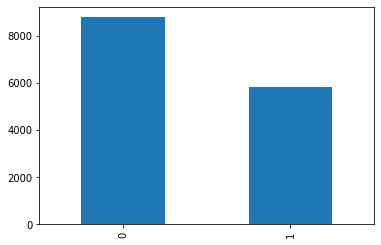

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 같은 리뷰 데이터 삭제
train['review'].nunique(), train['label'].nunique()

(8701, 2)

<AxesSubplot:>

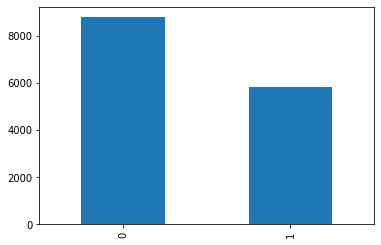

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

중복 리뷰는 없으므로 변화는 없다.

In [ ]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   8796
1      1   5845


### 전체적으로 크롤링하는 과정중 긍정적인 리뷰가 부정적인 리뷰보다 월등히 적었다.
=> 일부 상품에서는 긍정적인 리뷰가 없는 경우도 있었는데, 이런 경우에는 크롤링 과정중 부정적인 리뷰만 가져왔다.

In [ ]:
print(train.isnull().values.any()) # Null 값이 존재하는지 확인

False


# 6-1-1. 전처리

In [ ]:
train['review'] = train['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외한 불필요한 단어 제거
train[:5]

/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2086641613.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review'] = train['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외한 불필요한 단어 제거


,review,label
15261,널널한 사이즈가 아니거 살짝 짧지만 디자인은 이뻐요,0
20764,마크곤잘래스 후드 집업이랑 같이 입으면 예뻐요,1
1410,사이즈 딱이네여 어떤 바지랑도 매칭이 아주 잘어울려요,1
9485,사이즈가 생각보다 작긴한데 날씨 따뜻지면 잘 입을거 같아요,0
3567,역시 믿고사는 제품입니다 다음에도 사고 싶어요,1


In [ ]:
import numpy as np

In [ ]:
train['review'] = train['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train['review'].replace('', np.nan, inplace=True)
print(train.isnull().sum()) # 결측치를 가지고 있는 리뷰데이터 확인

review    1
label     0
dtype: int64


/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/1173763163.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review'] = train['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [ ]:
train.loc[train.review.isnull()][:5]

,review,label
6529,NaN,1


In [ ]:
train = train.dropna()

In [ ]:
len(train)

14640

### 혹시 몰라 리뷰 데이터를 크롤링할 떄 일부로 스타일(사진이 첨부된) 데이터만 가지고 왔지만
### 그럼에도 불구하고 한글이 아닌 자음이나 모음, 특수문자로만 이루어진 무성의한 리뷰를 작성한 사람은 1명이 있었다.

In [ ]:
test.drop_duplicates(subset = ['review'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test['review'] = test['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['review'] = test['review'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))

전처리 후 테스트용 샘플의 개수 : 4809


/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2897942762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['review'] = test['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2897942762.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test['review'] = test['review'].str.replace('^ +', "") # 공백은 empty 값으로 변경


# 6-1-2. 토큰화

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
from tqdm import tqdm # 진행률 확인을 위해 사용

In [ ]:
X_train = []
for sentence in tqdm(train['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 14640/14640 [00:32<00:00, 449.13it/s]


In [ ]:
print(X_train[:3])

[['널널', '사이즈', '아니다', '살짝', '짧다', '디자인', '이쁘다'], ['마크', '곤', '자다', '스', '후드', '집업', '이랑', '같이', '입다', '예쁘다'], ['사이즈', '딱', '네', '여', '어떻다', '바지', '랑', '매칭', '아주', '어울리다']]


In [ ]:
X_test = []
for sentence in tqdm(test['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 4809/4809 [00:09<00:00, 486.01it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'좋다': 1, '입다': 2, '같다': 3, '너무': 4, '이쁘다': 5, '이다': 6, '사이즈': 7, '있다': 8, '핏': 9, '예쁘다': 10, '보다': 11, '자다': 12, '옷': 13, '을': 14, '생각': 15, '사다': 16, '딱': 17, '크다': 18, '로': 19, '것': 20, '요': 21, '편하다': 22, '않다': 23, '다': 24, '바지': 25, '얇다': 26, '안': 27, '구매': 28, '기장': 29, '들다': 30, '재질': 31, '때': 32, '느낌': 33, '거': 34, '맞다': 35, '더': 36, '괜찮다': 37, '많이': 38, '색감': 39, '적당하다': 40, '되다': 41, '여름': 42, '조금': 43, '오': 44, '입': 45, '길이': 46, '제': 47, '허리': 48, '기다': 49, '맘': 50, '가격': 51, '아니다': 52, '그냥': 53, '만족하다': 54, '버핏': 55, '없다': 56, '진짜': 57, '두께': 58, '하고': 59, '마음': 60, '나오다': 61, '랑': 62, '수': 63, '이라': 64, '살짝': 65, '고': 66, '작다': 67, '색상': 68, '저': 69, '부분': 70, '다른': 71, '무난': 72, '제품': 73, '정도': 74, '감': 75, '만': 76, '정말': 77, '아쉽다': 78, '다니다': 79, '추천': 80, '색': 81, '인데': 82, 'ㅎㅎ': 83, '아주': 84, '디자인': 85, '엄청': 86, '그래도': 87, '네': 88, '근데': 89, '짧다': 90, '라': 91, '게': 92, '두껍다': 93, '약간': 94, '비': 95, '적': 96, '자주': 97, '팔': 98, '이랑': 99, '사진': 100, '나': 101, '면': 102, 

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6953
등장 빈도가 2번 이하인 희귀 단어의 수: 2953
단어 집합에서 희귀 단어의 비율: 42.47087588091472
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.677384780278671


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4001


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[532, 7, 52, 65, 90, 85, 5], [917, 12, 1267, 216, 487, 99, 255, 2, 10], [7, 17, 88, 191, 353, 25, 62, 1531, 84, 119]]


In [ ]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

14640
14640


/Users/cmblir/miniforge3/envs/test/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 330
리뷰의 평균 길이 : 16.291734972677595


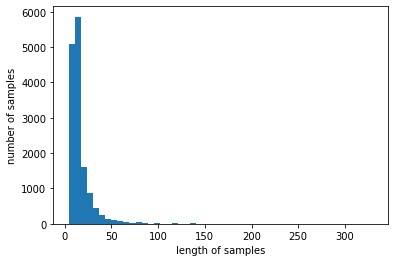

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 91.75546448087431


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/15


2022-05-02 09:14:00.171899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:14:00.403106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:14:00.512467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


364/366 [============================>.] - ETA: 0s - loss: 0.6565 - acc: 0.6100

2022-05-02 09:14:10.403714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:14:10.496275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.61475, saving model to best_model.h5
366/366 [==============================] - 12s 29ms/step - loss: 0.6566 - acc: 0.6096 - val_loss: 0.6442 - val_acc: 0.6148
Epoch 2/15
364/366 [============================>.] - ETA: 0s - loss: 0.6239 - acc: 0.6432
Epoch 2: val_acc did not improve from 0.61475
366/366 [==============================] - 10s 26ms/step - loss: 0.6238 - acc: 0.6433 - val_loss: 0.6440 - val_acc: 0.6110
Epoch 3/15
366/366 [==============================] - ETA: 0s - loss: 0.6044 - acc: 0.6656
Epoch 3: val_acc did not improve from 0.61475
366/366 [==============================] - 10s 27ms/step - loss: 0.6044 - acc: 0.6656 - val_loss: 0.6477 - val_acc: 0.6045
Epoch 4/15
366/366 [==============================] - ETA: 0s - loss: 0.5871 - acc: 0.6779
Epoch 4: val_acc did not improve from 0.61475
366/366 [==============================] - 9s 26ms/step - loss: 0.5871 - acc: 0.6779 - val_loss: 0.6633 - val_acc: 0.6042
Epoch 5/15
364/366 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

  1/151 [..............................] - ETA: 1:02 - loss: 0.6407 - acc: 0.5938

2022-05-02 09:15:04.030755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:15:04.121342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - 2s 10ms/step - loss: 0.6440 - acc: 0.6043

 테스트 정확도: 0.6043


# 7. 훈련 기반 리뷰 긍부정 예측

In [ ]:
import re

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('팔 너무 길고 목도 좁아요. 라운드숄더라 핏도 안예뻐보여요. 목 시보리도 너무 두꺼워서 급식패션같아요.. 사진은 흰색이에요. 검정색도 갔는데 둘다 별로에요.') # 22년 5월 2일 9시 17분 기준 커버낫 최신 후기 댓글

82.09% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('원단이 너무 얇아서 다 비치고 체형보완도 전혀 안됩니다') # 22년 5월 2일 9시 17분 기준 커버낫 최신 후기 댓글

77.10% 확률로 부정 리뷰입니다.



# 번외. 데이터 개수 조정후 재학습

In [ ]:
bad_reviews = bad_reviews[:8370]

In [ ]:
print("긍정 리뷰 : ", len(good_reviews), ", ", "부정 리뷰 : ", len(bad_reviews)) 

긍정 리뷰 :  8370 ,  부정 리뷰 :  8370


In [ ]:
total = pd.concat([good_reviews, bad_reviews])

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(total, test_size = 0.3, shuffle = True, random_state = 42)

<AxesSubplot:>

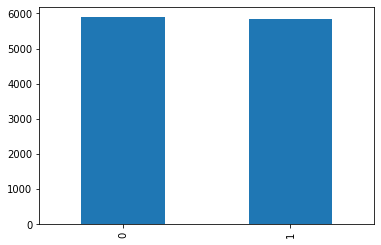

In [ ]:
train['label'].value_counts().plot(kind = 'bar')

In [ ]:
len(total)

16740

In [ ]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   5886
1      1   5832


In [ ]:
print("훈련 데이터 개수 : ", len(train),", ", "테스트 데이터 개수 : ", len(test))

훈련 데이터 개수 :  11718 ,  테스트 데이터 개수 :  5022


In [ ]:
print(train.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
train['review'] = train['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외한 불필요한 단어 제거
train[:5]

/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2086641613.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review'] = train['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외한 불필요한 단어 제거


,review,label
11761,얇아서 가볍게 입기좋고 여름에도 깔끔하게 입기좋을거같아요,1
8978,이뻐요여름이라 에 니트 이럴수도 있는데 얇아서 괜찮아요색감도 쿨해서 이뻐요,0
8261,올블랙으로 코디했는데 이쁘네요 ㅎㅎ셋업으로 말고 다른 이쁜 코디 추천해주세요,0
11235,두께감이 좀 있어서 여름엔 못입겠지만 재질도 좋고 셔츠에 매치하기 참 좋네요 만족합니당,1
16398,오트밀 상의가 있어 추가구입 셋업으로 입었어요 단품으로도 좋고 예전제품보다 길이가 ...,1


In [ ]:
train['review'] = train['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train['review'].replace('', np.nan, inplace=True)
print(train.isnull().sum()) # 결측치를 가지고 있는 리뷰데이터 확인

review    1
label     0
dtype: int64


/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/1173763163.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['review'] = train['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [ ]:
train = train.dropna()

In [ ]:
test.drop_duplicates(subset = ['review'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test['review'] = test['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['review'] = test['review'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))

전처리 후 테스트용 샘플의 개수 : 3878


/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2897942762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['review'] = test['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_23209/2897942762.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test['review'] = test['review'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [ ]:
X_train = []
for sentence in tqdm(train['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 11717/11717 [00:32<00:00, 364.70it/s]


In [ ]:
print(X_train[:3])

[['얇다', '가볍다', '입다', '좋다', '여름', '에도', '깔끔하다', '입다', '좋다', '같다'], ['이쁘다', '여름', '이라', '니트', '이렇다', '있다', '얇다', '괜찮다', '색감', '쿨하다', '이쁘다'], ['올블랙', '코디', '이쁘다', 'ㅎㅎ', '셋업', '말고', '다른', '이쁘다', '코디', '추천', '해주다']]


In [ ]:
X_test = []
for sentence in tqdm(test['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 3878/3878 [00:10<00:00, 369.79it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6189
등장 빈도가 2번 이하인 희귀 단어의 수: 2705
단어 집합에서 희귀 단어의 비율: 43.70657618355146
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9350039810585424


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3485


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[23, 136, 2, 1, 40, 131, 156, 2, 1, 3], [5, 40, 62, 213, 289, 8, 23, 37, 38, 5], [1434, 188, 5, 71, 324, 968, 84, 5, 188, 76, 354]]


In [ ]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

11717
11717


/Users/cmblir/miniforge3/envs/test/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 30
리뷰의 평균 길이 : 30.0


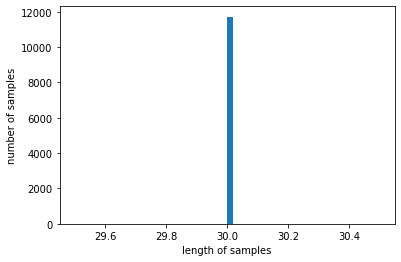

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.05428010582914


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# 배치 사이즈 64로 변경

Epoch 1/15


2022-05-02 09:27:42.715879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:27:43.020213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/147 [..............................] - ETA: 4:12 - loss: 0.6944 - acc: 0.4531

2022-05-02 09:27:43.229737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


147/147 [==============================] - ETA: 0s - loss: 0.6639 - acc: 0.5946

2022-05-02 09:27:48.510221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:27:48.603092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.62884, saving model to best_model.h5
147/147 [==============================] - 8s 40ms/step - loss: 0.6639 - acc: 0.5946 - val_loss: 0.6380 - val_acc: 0.6288
Epoch 2/15
146/147 [============================>.] - ETA: 0s - loss: 0.5986 - acc: 0.6738
Epoch 2: val_acc improved from 0.62884 to 0.63993, saving model to best_model.h5
147/147 [==============================] - 5s 31ms/step - loss: 0.5988 - acc: 0.6735 - val_loss: 0.6360 - val_acc: 0.6399
Epoch 3/15
146/147 [============================>.] - ETA: 0s - loss: 0.5661 - acc: 0.6986
Epoch 3: val_acc improved from 0.63993 to 0.64164, saving model to best_model.h5
147/147 [==============================] - 4s 29ms/step - loss: 0.5658 - acc: 0.6989 - val_loss: 0.6505 - val_acc: 0.6416
Epoch 4/15
147/147 [==============================] - ETA: 0s - loss: 0.5427 - acc: 0.7142
Epoch 4: val_acc did not improve from 0.64164
147/147 [==============================] - 4s 29ms/step - loss: 0.5427 - a

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

2022-05-02 09:28:18.820522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:28:18.912524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


122/122 [==============================] - 2s 12ms/step - loss: 0.6332 - acc: 0.6498

 테스트 정확도: 0.6498


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('팔 너무 길고 목도 좁아요. 라운드숄더라 핏도 안예뻐보여요. 목 시보리도 너무 두꺼워서 급식패션같아요.. 사진은 흰색이에요. 검정색도 갔는데 둘다 별로에요.') # 22년 5월 2일 9시 17분 기준 커버낫 최신 후기 댓글

85.81% 확률로 부정 리뷰입니다.



2022-05-02 09:28:34.118584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 09:28:34.182696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
sentiment_predict('원단이 너무 얇아서 다 비치고 체형보완도 전혀 안됩니다') # 22년 5월 2일 9시 17분 기준 커버낫 최신 후기 댓글

88.94% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict("""후기 보고 사길 잘했다. S인데 왕커요. 제가 어깨가 좀 넓어서 박스티를 입어도 L나 XL 정도 입어야 박시한 느낌이 나는데 이건 S로 성공입니다. 여자분들은 M 이상으로 가시면 너무 클 것 같아요.

흰색은 조금 비쳐요. 첫번째 사진 반바지 비침 보이시죠. 속옷 어두운 색 말고 스킨톤 입으세요 ㅎ 가슴너비도 이정도면 꽤 박시해요.

소재는 쿨코튼이라는 이름에 걸맞게 살짝 서그럭거리고 차가운 재질이에요. 일반 면티랑 좀 판판한 기능성 티 중간 느낌이라 해야 할까요. 말랑부들찰랑거리는 재질은 아니에요. 몸에 달라붙는 소재가 아니라 여름에 편하고 시원할 것 같아요. 사진으로 재질 느낌이 참고가 될 지 모르겠네요.

이러나저러나 가성비 나이스~""")

62.10% 확률로 부정 리뷰입니다.



In [ ]:
sentiment_predict('옷도 예쁘고 엄청 시원해요. 다음에도 주문할 의향 있음')

54.28% 확률로 긍정 리뷰입니다.

